In [30]:
import pandas as pd
from glob import glob
from collections import Counter 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
BLOOD_MICROBIOME_DIR = '/home/groups/dpwall/briannac/blood_microbiome/'


BAM_MAPPINGS_FILE = '/home/groups/dpwall/briannac/general_data/bam_mappings.csv'
CONC_FILE= '/home/groups/dpwall/briannac/blood_microbiome/data/decontam/concentrations.csv'
NYGC_FILE = '/home/groups/dpwall/briannac/blood_microbiome/intermediate_files/decontam/NYGC_DNA_stats'

ABUNDANCES_EXACT_FILE = '/home/groups/dpwall/briannac/blood_microbiome/data/kraken_align/abundances_exact.csv'
ABUNDANCES_CHILDREN_FILE = '/home/groups/dpwall/briannac/blood_microbiome/data/kraken_align/abundances_children.csv'

FOR_DECONTAM_CHILDREN_FILE = BLOOD_MICROBIOME_DIR + 'intermediate_files/decontam/for_decontam_children.csv'
FOR_DECONTAM_EXACT_FILE = BLOOD_MICROBIOME_DIR + 'intermediate_files/decontam/for_decontam_exact.csv'


DECONTAM_CHILDREN_FILE = BLOOD_MICROBIOME_DIR + 'results/decontam/contaminants_children.csv'
DECONTAM_EXACT_FILE = BLOOD_MICROBIOME_DIR + 'results/decontam/contaminants_exact.csv'


In [44]:
bam_mappings = pd.read_csv(BAM_MAPPINGS_FILE, sep='\t', index_col=1)
abundances_exact = pd.read_csv(ABUNDANCES_EXACT_FILE, index_col=0)
abundances_children = pd.read_csv(ABUNDANCES_CHILDREN_FILE, index_col=0)


# Filter duplicate rows (helpful for abundances_children)
#abundances_children = abundances_children[~abundances_children.drop(['tax_level', 'tax_id'], axis=1).duplicated(keep='last')]
#abundances_exact = abundances_exact[~abundances_exact.drop(['tax_level', 'tax_id'], axis=1).duplicated(keep='last')]

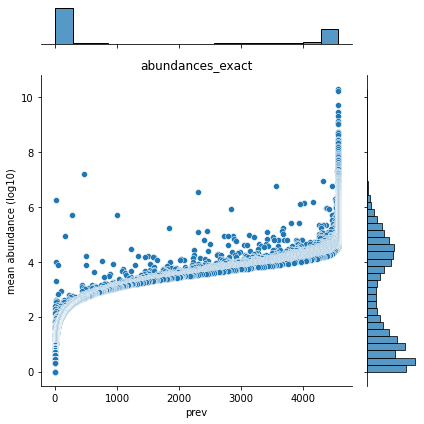

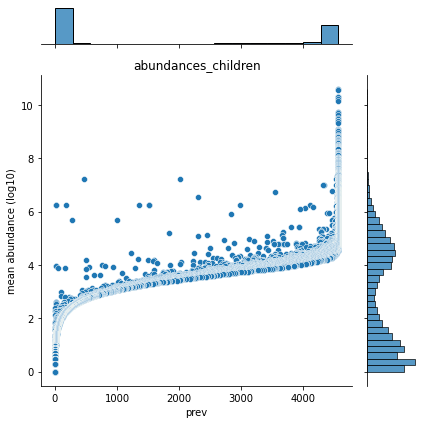

In [45]:
h = sns.jointplot(y=np.log10(abundances_exact.drop(['tax_level', 'tax_id'], axis=1).sum(axis=1)), 
              x=(abundances_exact.drop(['tax_level', 'tax_id'], axis=1)>0).sum(axis=1))
h.ax_joint.set_xlabel('prev')
h.ax_joint.set_ylabel('mean abundance (log10)')
h.ax_joint.set_title('abundances_exact')
plt.tight_layout()


h = sns.jointplot(y=np.log10(abundances_children.drop(['tax_level', 'tax_id'], axis=1).sum(axis=1)), 
              x=(abundances_children.drop(['tax_level', 'tax_id'], axis=1)>0).sum(axis=1))
h.ax_joint.set_xlabel('prev')
h.ax_joint.set_ylabel('mean abundance (log10)')
h.ax_joint.set_title('abundances_children')
plt.tight_layout()


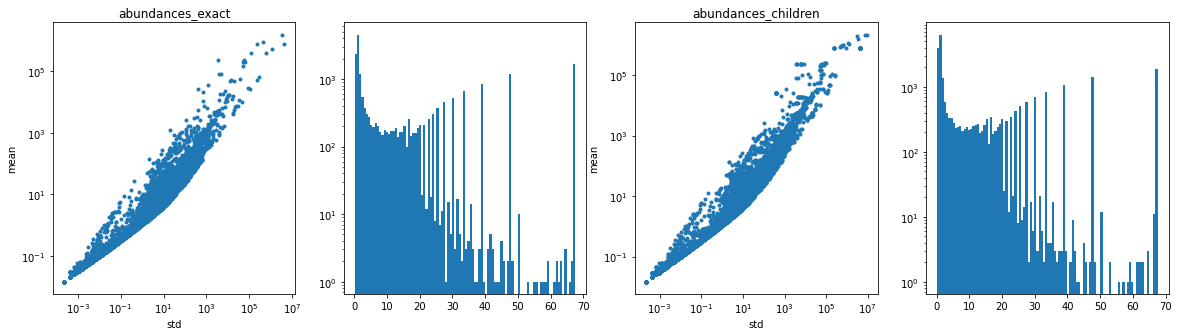

In [46]:
f, ax = plt.subplots(ncols=4, figsize=(20,5))
normalized_std_exact = abundances_exact.drop(['tax_level', 'tax_id'], axis=1).std(axis=1)/abundances_exact.drop(['tax_level', 'tax_id'], axis=1).mean(axis=1)
ax[0].plot(abundances_exact.drop(['tax_level', 'tax_id'], axis=1).mean(axis=1).values,abundances_exact.drop(['tax_level', 'tax_id'], axis=1).std(axis=1).values, '.')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('std')
ax[0].set_ylabel('mean')
ax[0].set_title('abundances_exact')

ax[1].hist(normalized_std_exact, bins=100)
ax[1].set_yscale('log')

normalized_std_children = abundances_children.drop(['tax_level', 'tax_id'], axis=1).std(axis=1)/abundances_children.drop(['tax_level', 'tax_id'], axis=1).mean(axis=1)
ax[2].plot(abundances_children.drop(['tax_level', 'tax_id'], axis=1).mean(axis=1).values,abundances_children.drop(['tax_level', 'tax_id'], axis=1).std(axis=1).values, '.')
ax[2].set_xscale('log')
ax[2].set_yscale('log')
ax[2].set_xlabel('std')
ax[2].set_ylabel('mean')
ax[2].set_title('abundances_children')

ax[3].hist(normalized_std_children, bins=100)
ax[3].set_yscale('log')
plt.show()


In [47]:
abundances_exact

,tax_level,tax_id,MH0143019,02C10540,02C10541,02C10542,02C10543,02C10702,02C10704,02C10855,...,MH0138051,MH0138052,MH0138054,MH0138055,MH0138989,MH0143008,MH0143009,MH0143013,MH0143018,MH0143019.1
name,,,,,,,,,,,,,,,,,,,,,
Homo sapiens,S,9606,4585191,4031085,5015882,4183931,4833557,3168353,3575853,3531485,...,4481482,4737301,5638657,4391834,3502544,5002796,4566202,5460285,4730844,4585191
unclassified,U,0,2698599,6081913,6051883,5001451,7554316,1738276,2285378,2464925,...,3515649,2983513,3973420,3033639,2042037,3352599,3346913,3667026,3576385,2698599
root,R,1,304354,1053312,1076753,489407,1184952,763254,709168,955702,...,481815,267678,963692,839244,882192,109033,574533,279261,661633,304354
Bacteria,D,2,445060,1029785,940046,309114,1229197,876610,1305724,539749,...,456462,451618,647863,657136,388926,392428,572871,520361,590702,445060
Staphylococcus aureus,S,1280,66881,302927,437818,64626,502432,1789977,996126,287002,...,662871,111111,114897,99521,68292,102369,402246,115867,158095,66881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rhynchosia mild mosaic virus,S,714308,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Nodamura virus,S,12288,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Pectobacterium phage Koot,S1,2489628,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
#abundances_exact.loc[abundances_exact.index[0],'tax_level']='Human'
#tax_level_sums = abundances_exact.drop('tax_id', axis=1).groupby('tax_level').sum().sum(axis=1)
pd.DataFrame(tax_level_sums).sort_values(0, ascending=False).iloc[2:].apply(lambda x: x/sum(x)).head(10)

,0
tax_level,
S,0.378539
R,0.252080
D,0.139226
R1,0.065494
C,0.060992
P,0.028200
S1,0.026684
D1,0.014976
S2,0.012682


In [ ]:
tax_level_sums = abundances_children.drop('tax_id', axis=1).groupby('tax_level').sum().sum(axis=1)
pd.DataFrame(tax_level_sums).apply(lambda x: x/sum(x)).sort_values(0, ascending=False)

In [43]:
abundances_children.loc[abundances_children.index[2],'tax_level']='Human'
tax_level_sums = abundances_children.drop('tax_id', axis=1).groupby('tax_level').sum().sum(axis=1)
pd.DataFrame(tax_level_sums).apply(lambda x: x/sum(x)).sort_values(0, ascending=False).head(20)

SyntaxError: invalid syntax (<ipython-input-43-014ccc91ee53>, line 3)

In [5]:
abundances_children.iloc[np.argsort(normalized_std_children)[::-1]].head(10)

,tax_level,tax_id,02C10540,02C10541,02C10542,02C10543,02C10702,02C10704,02C10855,02C10856,...,MH0138051,MH0138052,MH0138054,MH0138055,MH0138989,MH0143008,MH0143009,MH0143013,MH0143018,MH0143019
name,,,,,,,,,,,,,,,,,,,,,
Human parvovirus B19,S1,10798,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Primate erythroparvovirus 1,S,1511900,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Erythroparvovirus,G,40121,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Parvovirinae,F1,40119,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,2,0,0,1
Parvoviridae,F,10780,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,2,0,0,1
Piccovirales,O,2732534,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,2,0,0,1
Quintoviricetes,C,2732422,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,2,0,0,1
unclassified Erythroparvovirus,G1,344889,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Human erythrovirus V9,S,72197,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
abundances_sorted = abundances_children.iloc[np.argsort(normalized_std_children)[::-1]].drop(['tax_id', 'tax_level'], axis=1)
i = 8
print(abundances_sorted.index[i])
a=abundances_sorted.iloc[i]
plt.plot(a.values, '.')
plt.yscale('log')

In [1]:
abundances_exact.hed()

NameError: name 'abundances_exact' is not defined

In [24]:
tax_level_sums

,tax_level,tax_id,MH0143019,02C10540,02C10541,02C10542,02C10543,02C10702,02C10704,02C10855,...,MH0138051,MH0138052,MH0138054,MH0138055,MH0138989,MH0143008,MH0143009,MH0143013,MH0143018,MH0143019.1
name,,,,,,,,,,,,,,,,,,,,,
Homo sapiens,S,9606,4585191,4031085,5015882,4183931,4833557,3168353,3575853,3531485,...,4481482,4737301,5638657,4391834,3502544,5002796,4566202,5460285,4730844,4585191
unclassified,U,0,2698599,6081913,6051883,5001451,7554316,1738276,2285378,2464925,...,3515649,2983513,3973420,3033639,2042037,3352599,3346913,3667026,3576385,2698599
root,R,1,304354,1053312,1076753,489407,1184952,763254,709168,955702,...,481815,267678,963692,839244,882192,109033,574533,279261,661633,304354
Bacteria,D,2,445060,1029785,940046,309114,1229197,876610,1305724,539749,...,456462,451618,647863,657136,388926,392428,572871,520361,590702,445060
Staphylococcus aureus,S,1280,66881,302927,437818,64626,502432,1789977,996126,287002,...,662871,111111,114897,99521,68292,102369,402246,115867,158095,66881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Escherichia coli SE15,S1,431946,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dehalococcoides mccartyi CBDB1,S1,255470,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
Chlamydia trachomatis E/150,S1,707184,0,1,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0


In [21]:
abundances_exact.iloc[3:].drop('tax_id', axis=1).head()

,tax_level,MH0143019,02C10540,02C10541,02C10542,02C10543,02C10702,02C10704,02C10855,02C10856,...,MH0138051,MH0138052,MH0138054,MH0138055,MH0138989,MH0143008,MH0143009,MH0143013,MH0143018,MH0143019.1
name,,,,,,,,,,,,,,,,,,,,,
root,R,304354,1053312,1076753,489407,1184952,763254,709168,955702,317141,...,481815,267678,963692,839244,882192,109033,574533,279261,661633,304354
Bacteria,D,445060,1029785,940046,309114,1229197,876610,1305724,539749,472717,...,456462,451618,647863,657136,388926,392428,572871,520361,590702,445060
Staphylococcus aureus,S,66881,302927,437818,64626,502432,1789977,996126,287002,509550,...,662871,111111,114897,99521,68292,102369,402246,115867,158095,66881
cellular organisms,R1,314401,225129,365191,280083,297844,225088,270531,228073,226985,...,282488,331210,409607,256917,243978,325664,321012,387652,309235,314401
Pseudomonas tolaasii,S,197853,13919,9082,5426,11162,2675,2549,3679,2916,...,2733,2712,3069,2763,1967,211738,3119,231075,1946,197853


In [14]:
tax_level_sums

MH0143019      10709348
02C10540       15223814
02C10541       16147695
02C10542       12440027
02C10543       18217343
                 ...   
MH0143008      11544413
MH0143009      12371923
MH0143013      12918457
MH0143018      12131729
MH0143019.1    10709348
Length: 4570, dtype: int64

In [6]:
abundances_exact.iloc[np.argsort(normalized_std_exact)[::-1]].head(20)

,tax_level,tax_id,MH0143019,02C10540,02C10541,02C10542,02C10543,02C10702,02C10704,02C10855,...,MH0138051,MH0138052,MH0138054,MH0138055,MH0138989,MH0143008,MH0143009,MH0143013,MH0143018,MH0143019.1
name,,,,,,,,,,,,,,,,,,,,,
Human parvovirus B19,S1,10798,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Human erythrovirus V9,S,72197,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Erythroparvovirus,G,40121,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Human adenovirus 1,S1,10533,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Human betaherpesvirus 6B,S,32604,4,0,0,0,0,0,0,40391,...,0,0,0,0,2,0,0,2,0,4
Moloney murine leukemia virus,S1,11801,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Rhesus macaque parvovirus,S1,119756,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Roseolovirus,G,40272,0,0,0,0,0,0,0,286,...,0,0,0,0,0,0,0,0,0,0
Human mastadenovirus C,S,129951,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


                  Human mastadenovirus C


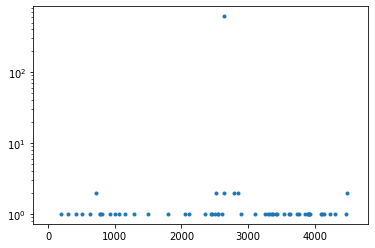

In [8]:
abundances_sorted = abundances_exact.iloc[np.argsort(normalized_std_exact)[::-1]].drop(['tax_id', 'tax_level'], axis=1)
i = 8
print(abundances_sorted.index[i])
a=abundances_sorted.iloc[i]
plt.plot(a.values, '.')
plt.yscale('log')

In [6]:
# Filter.
#abundances_children = abundances_children[abundances_children.drop(['tax_level', 'tax_id'], axis=1).sum(axis=1)>100]
#abundances_children = abundances_children[~abundances_children.drop(['tax_level', 'tax_id'], axis=1).duplicated(keep='last')]
#abundances_exact = abundances_exact[abundances_exact.drop(['tax_level', 'tax_id'], axis=1).sum(axis=1)>100]
#abundances_exact = abundances_exact[~abundances_exact.drop(['tax_level', 'tax_id'], axis=1).duplicated(keep='last')]